## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [3]:
df = pd.read_csv("/Users/cicisofia/Downloads/distance_dataset (1).csv")

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [15]:

# Preview the columns to ensure X, Y, Z exist
print("Columns:", df.columns)

# Step 1: Create 2D and 3D matrices
matrix_2d = df[['Y', 'Z']].values  # 2D Matrix with Y and Z
matrix_3d = df[['X', 'Y', 'Z']].values  # 3D Matrix with X, Y, Z

# Step 2: Choose reference vectors
reference_vector_2d = np.array([[5, 5]])  # must be 2D array
reference_vector_3d = np.array([[5, 5, 5]])

# Step 3: Compute cosine similarity
cos_sim_2d = cosine_similarity(matrix_2d, reference_vector_2d)
cos_sim_3d = cosine_similarity(matrix_3d, reference_vector_3d)

# Step 4: Add results to dataframe
df['cosine_sim_2d'] = cos_sim_2d
df['cosine_sim_3d'] = cos_sim_3d
ref_2d = np.array([[5, 5]])
ref_3d = np.array([[5, 5, 5]])
# Preview the result
print(df[['X', 'Y', 'Z', 'cosine_sim_2d', 'cosine_sim_3d']].head())


Columns: Index(['Unnamed: 0', 'X', 'Y', 'Z', 'ClusterID', 'cosine_sim_2d',
       'cosine_sim_3d'],
      dtype='object')
          X         Y         Z  cosine_sim_2d  cosine_sim_3d
0  5.135779  4.167542  5.787635       0.987015       0.991360
1  4.280721  5.770909  6.091044       0.999636       0.989424
2  8.329098  7.540436  3.247239       0.929125       0.943731
3  5.470224  5.069249  5.768313       0.997926       0.998615
4  2.381797  2.402374  3.879101       0.973461       0.971775


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [17]:
simCosine_2d = 1. - cosine_similarity(matrix_2d, ref_2d)
simCosine_3d = 1. - cosine_similarity(matrix_3d, ref_3d)

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

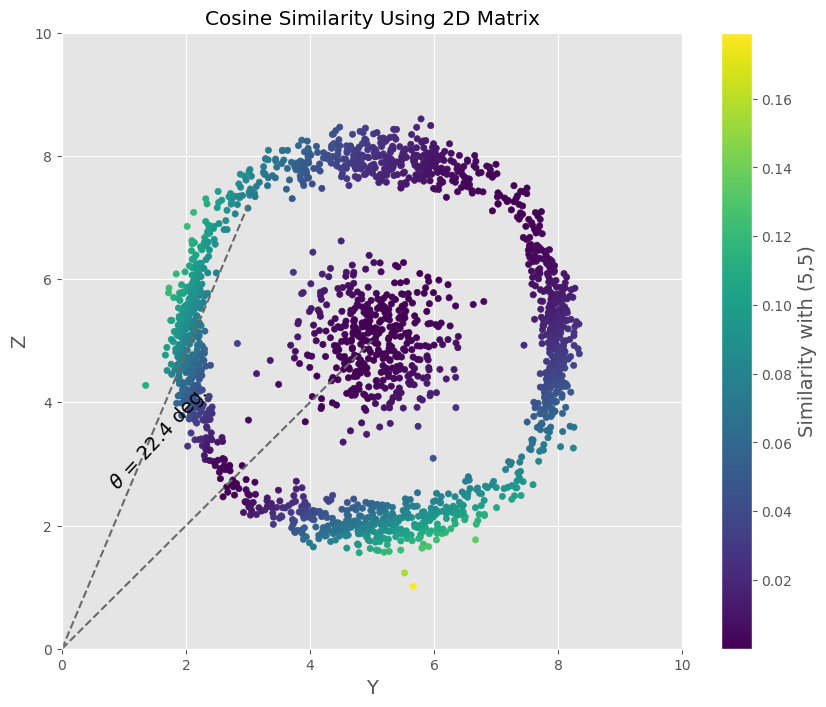

In [21]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine_2d[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity Using 2D Matrix')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

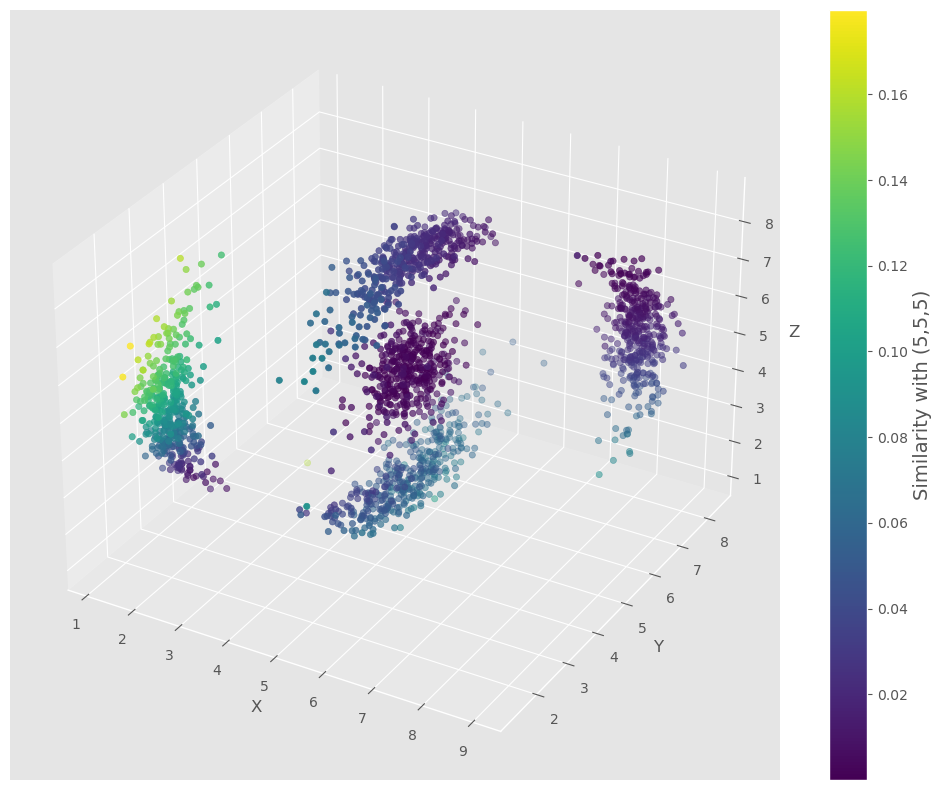

In [31]:
from mpl_toolkits.mplot3d import Axes3D
figCosine_3d = plt.figure(figsize=(10, 8))
ax = figCosine_3d.add_subplot(111, projection='3d')

p = ax.scatter(matrix_3d[:,0], matrix_3d[:,1], matrix_3d[:,2], c=simCosine_3d[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine_3d.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine_3d.tight_layout()
#figCosine_3d.savefig('cosine-3d.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the documents
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"
corpus = [Document1, Document2]

# Initialize and fit the CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)

# Create a DataFrame with feature names
pd.DataFrame(
    X_train_counts.toarray(),
    columns=count_vect.get_feature_names_out(),
    index=['Document 0', 'Document 1']
)


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names_out(),index=['Document 0','Document 1'])

,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [43]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Replace with your own sentences
Document0 = "The mangrove forest protects the shoreline from erosion and provides a home for wildlife."
Document1 = "Mangroves offer coastal protection and shelter many animal species from storms."
corpus = [Document0, Document1]


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [47]:
# Step 2: Count Vectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [49]:
# View word count vectors as DataFrame
count_df = pd.DataFrame(
    count_matrix.toarray(),
    columns=count_vectorizer.get_feature_names_out(),
    index=['Document 0', 'Document 1']
)
print("Count Vectorizer Output:")
print(count_df)

Count Vectorizer Output:
            and  animal  coastal  erosion  for  forest  from  home  mangrove  \
Document 0    1       0        0        1    1       1     1     1         1   
Document 1    1       1        1        0    0       0     1     0         0   

            mangroves  ...  offer  protection  protects  provides  shelter  \
Document 0          0  ...      0           0         1         1        0   
Document 1          1  ...      1           1         0         0        1   

            shoreline  species  storms  the  wildlife  
Document 0          1        0       0    2         1  
Document 1          0        1       1    0         0  

[2 rows x 21 columns]


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [51]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=['Document 0', 'Document 1']
)
print("TF-IDF Output:")
print(tfidf_df)


TF-IDF Output:
                 and   animal  coastal   erosion       for    forest  \
Document 0  0.190074  0.00000  0.00000  0.267142  0.267142  0.267142   
Document 1  0.224858  0.31603  0.31603  0.000000  0.000000  0.000000   

                from      home  mangrove  mangroves  ...    offer  protection  \
Document 0  0.190074  0.267142  0.267142    0.00000  ...  0.00000     0.00000   
Document 1  0.224858  0.000000  0.000000    0.31603  ...  0.31603     0.31603   

            protects  provides  shelter  shoreline  species   storms  \
Document 0  0.267142  0.267142  0.00000   0.267142  0.00000  0.00000   
Document 1  0.000000  0.000000  0.31603   0.000000  0.31603  0.31603   

                 the  wildlife  
Document 0  0.534284  0.267142  
Document 1  0.000000  0.000000  

[2 rows x 21 columns]


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [53]:
cosine_sim = cosine_similarity(tfidf_matrix)

print("Cosine Similarity Matrix:")
print(cosine_sim)

Cosine Similarity Matrix:
[[1.         0.08547935]
 [0.08547935 1.        ]]
